In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from tqdm import tqdm
# from spacepy import pycdf
import cdflib
import netCDF4 as nc
import pytz
import cartopy.crs as ccrs
import datetime
from utilities.IONEX import dmd_ionex,ionex_filename_to_date
import matplotlib.dates as mdates



%matplotlib inline
# Larger figure size
fig_size = [14, 10]
plt.rcParams['figure.figsize'] = fig_size

import subprocess
import os

FileNotFoundError: [Errno 2] No such file or directory: '7z': '7z'

||Code | Meaning|
|-:|:--|:--------------------------------------------------------------------|
|1|c1p | 1-day predicted solution (CODE)                                     |
|2|c2p | 2-day predicted solution (CODE)                                     |
|3|cod | Final solution (CODE)                                               |
|4|cor | Rapid solution (CODE)                                               |
|5|e1p | 1-day predicted solution (ESA)                                      |
|6|e2p | 2-day predicted solution (ESA)                                      |
|7|ehr | Rapid high-rate solution, one map per hour, (ESA)                   |
|8|esa | Final solution (ESA)                                                |
|9|esr | Rapid solution (ESA)                                                |
|10|ilp | 1-day predicted solution (IGS combined)                             |
|11|i2p | 2-day predicted solution (IGS combined)                             |
|12|igr | Rapid solution (IGS combined)                                       |
|13|igs | Final combined solution (IGS combined)                              |
|14|jpl | Final solution (JPL)                                                |
|15|u2p | 2 day predicted solution (UPC)                                      |
|16|upc | Final solution (UPC)                                                |
|17|uhr | Rapid high-rate solution, one map per hour, (UPC)                   |
|18|upr | Rapid solution (UPC)                                                |
|19|uqr | Rapid high-rate solution, one map per 15 minutes, (UPC)             |

https://cddis.nasa.gov/Data_and_Derived_Products/GNSS/atmospheric_products.html<br>
https://notebook.community/daniestevez/jupyter_notebooks/IONEX<br>
https://github.com/gnss-lab/ionex/tree/master/ionex<br>
https://spdf.gsfc.nasa.gov/pub/data/gps/tec15min_igs/<br>


<p>netCDF : </p>
https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648<br>

In [4]:
from utilities.IONEX import IONEX

YEARS = [2013,2014]
DAYS = list(range(1,366))

# ionex_igs = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_igs'),centre='igs')
# ionex_c1p = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_c1p'),centre='c1p')
# ionex_gps = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex'),centre='cod')
ionex_igr = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_igr'),centre='igr')


# ionex_igs.download_ionex(YEARS,DAYS,debug=False)
# ionex_c1p.download_ionex(YEARS,DAYS,debug=False)
# ionex_gps.download_ionex(YEARS,DAYS,debug=True)
ionex_igr.download_ionex(YEARS,DAYS,debug=True)


/Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/zip/igrg0010.13i.Z  exist!
Extracting... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/igrg0010.13i
Downloading... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/zip/igrg0020.13i.Z


e: 7z: command not found


Extracting... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/igrg0020.13i
Downloading... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/zip/igrg0030.13i.Z


e: 7z: command not found


Extracting... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/igrg0030.13i
Downloading... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/zip/igrg0040.13i.Z


e: 7z: command not found


Extracting... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/igrg0040.13i
Downloading... :  /Volumes/SSD PhD/PhD/TEC/ionex_igr/2013/zip/igrg0050.13i.Z


e: 7z: command not found


KeyboardInterrupt: 

In [3]:
days_list = list(range(1,366)) # all years days [1,365]
years_list = YEARS#[2013]
# gps = ionex_gps.get_numpy_tecmaps(years_list,dyas_list)
c1p,c1p_file_names = ionex_c1p.get_numpy_tecmaps(years_list,days_list)
igs,igs_file_names = ionex_igs.get_numpy_tecmaps(years_list,days_list)


Year : 2013, Days :  79%|███████▉  | 289/365 [00:34<00:08,  9.15it/s]

[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2880.13i' /Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2880.13i
[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2900.13i' /Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2900.13i


Year : 2013, Days :  81%|████████  | 295/365 [00:34<00:05, 12.24it/s]

[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2930.13i' /Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2930.13i
[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2940.13i' /Volumes/SSD PhD/PhD/TEC/ionex_c1p/2013/c1pg2940.13i


Year : 2013, Days :  79%|███████▉  | 289/365 [00:43<00:09,  7.69it/s]

[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2880.13i' /Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2880.13i
[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2900.13i' /Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2900.13i


Year : 2013, Days :  81%|████████  | 295/365 [00:44<00:06, 10.81it/s]

[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2930.13i' /Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2930.13i
[Errno 2] No such file or directory: '/Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2940.13i' /Volumes/SSD PhD/PhD/TEC/ionex_igs/2013/igsg2940.13i


Year : 2014, Days : 100%|██████████| 365/365 [01:21<00:00,  4.48it/s]


In [4]:
def index_rms_by_thr(source,target,thr_rms = 15):
    
    days,hours,h,w = source.shape
    
    indecies_arr,rmse_max_vals,rmses = [],[],[]
        
    def check_day_max_rmse(source_day,target_day):
        sub = source_day - target_day
        pow = np.square(sub)
        mean = np.mean(pow,axis=(1,2))
        rms = np.sqrt(mean)
        # print(np.max(rms),rms.shape)
        
        return np.max(rms),rms
        
    
    for day_index in range(days):
        source_day = source[day_index]
        target_day = target[day_index]
        
        
        max_rmse,rmse = check_day_max_rmse(source_day,target_day)
        rmse_max_vals.append(max_rmse)
        rmses.append(rmse)
        if max_rmse >= thr_rms:
            indecies_arr.append(day_index)
        
    indecies_arr = np.array(indecies_arr)
    
    return indecies_arr,rmse_max_vals,rmses
    
thr_indecies,rmse_max_vals,rmses = index_rms_by_thr(igs,c1p)
len(c1p_file_names),c1p.shape


(726, (726, 13, 71, 73))

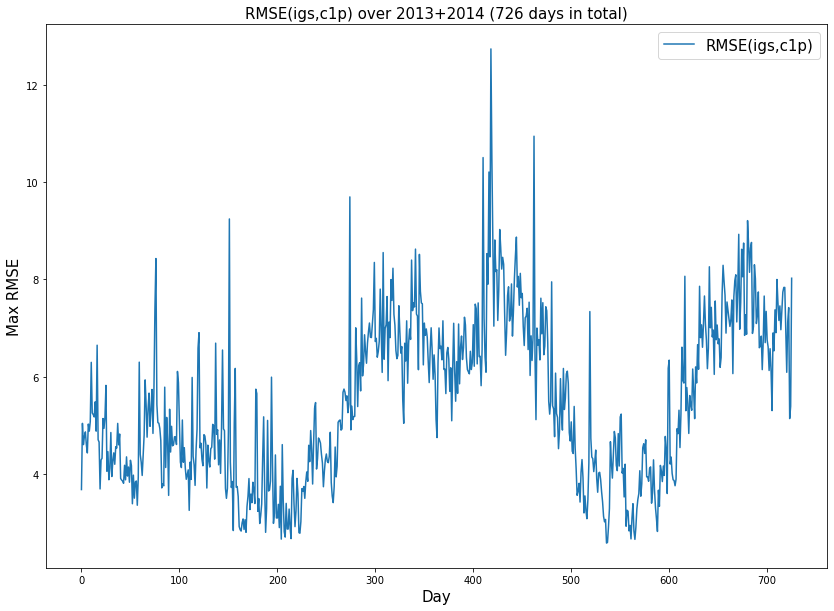

(array([8.92399262, 7.23140753, 6.2016746 , 4.49442534, 4.07835375,
        4.1773144 , 3.90467175, 3.99782837, 3.27684125, 3.14533026,
        3.52494788, 4.05917711, 4.30282988]),
 '/Volumes/SSD PhD/PhD/TEC/ionex_c1p/2014/c1pg3110.14i')

In [5]:
plt.title("RMSE(igs,c1p) over 2013+2014 (726 days in total)",fontsize=15)
plt.plot(rmse_max_vals,label='RMSE(igs,c1p)')
plt.xlabel("Day",fontsize=15)
plt.ylabel("Max RMSE",fontsize=15)
plt.legend(prop={'size':15})
plt.show()
rmses[671],c1p_file_names[671]

In [6]:
# c1p = c1p[:,:,16:30,38:48]
# igs = igs[:,:,16:30,38:48]

In [7]:
from utilities.IONEX import IONEX_CDF,date_to_year_day_number,time_to_index_day_number,index_day_number_to_time
# ionex_igs15 = IONEX_CDF(save_directory=os.path.join(os.path.abspath('.'),'igs_15min'))

# igs15 = ionex_igs15.get_numpy_tecmaps([2013,2014])
# igs15 = ionex_igs15.get_numpy_tecmaps([2017])
# igs15.shape

In [52]:
A = igs[:,:12,:,:]
print(A.shape)
print(A.T.shape)

# A = A[:,:,:,:] 
day,hour,h,w = A.shape
 # filter dual data of 0/24 hour
A = A.reshape(day*hour,h*w).T
# A = A.reshape(day*hour,h,w).T
# A = A.reshape(w*h,-1)
# A_std = np.std(A)
# A_mean = np.mean(A,axis=1).reshape(-1,1)
# A = (A - A_mean) #/ A_std

A.shape#,A_mean.shape,A_mean.reshape(h,w).shape

(726, 12, 71, 73)
(73, 71, 12, 726)


(5183, 8712)

/Users/vladlanda/opt/anaconda3/envs/phd37/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


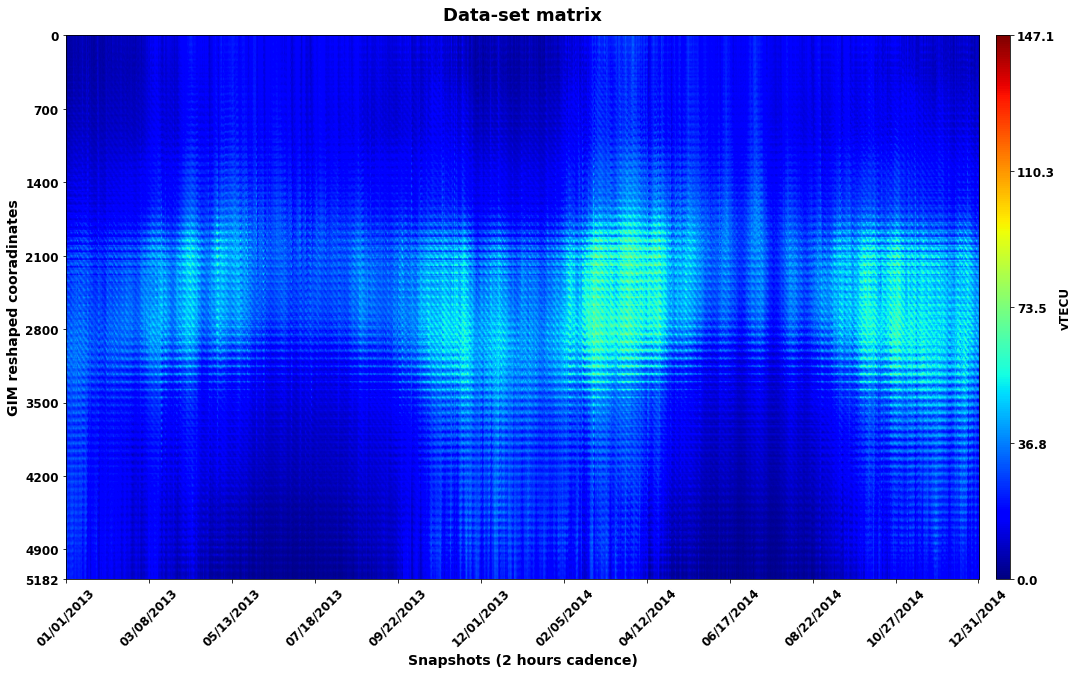

In [81]:
X = A[:,:365*13-1]
Xprime = A[:,1:365*13]
# sample = X[:,0].reshape(h,w)
# plt.imshow(A-np.mean(A,axis=0))



# %matplotlib qt
plt.figure(figsize=(30,10))
# plt.figure(figsize=(15,15))

ax = plt.axes()


x_ticks_labels = np.array([ionex_filename_to_date(f).strftime("%m/%d/%Y") for f in igs_file_names])
x_ticks = np.arange(0,A.shape[1],12)
x_ticks_intervals = np.append(np.arange(0,x_ticks.shape[0],66),725 )
ax.set_xticks(x_ticks[x_ticks_intervals],x_ticks_labels[x_ticks_intervals],rotation = 45)



y_ticks = np.append(np.arange(0,A.shape[0],700),A.shape[0]-1)
ax.set_yticks(y_ticks)

ax.set_xlabel('Snapshots (2 hours cadence)',fontsize=14,fontweight='bold')
ax.set_ylabel('GIM reshaped cooradinates',fontsize=14,fontweight='bold')


plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')




im = ax.imshow(A,cmap='jet')
# color bar 
cbar = plt.colorbar(im,shrink=1, aspect=40, fraction=.12,pad=.01)
cbar_ticks = [float('{:.1f}'.format(v)) for v in np.linspace(np.min(A),np.max(A),5)]
cbar.ax.set_yticklabels(cbar_ticks,weight='bold', fontsize=12)
cbar.ax.set_yticks(cbar_ticks)
cbar.set_label('vTECU',fontsize=12,fontweight='bold')

ax.set_title('Data-set matrix',fontsize=18,fontweight='bold',pad=15)

plt.show()

In [10]:

# fig, axs = plt.subplots(5,figsize=(15,15))
# n = 267


# # axs[0].imshow(np.concatenate((A[:,1124].reshape(w,h).T,A[:,1129].reshape(w,h).T),1))
# axs[1].imshow(A[:,n].reshape(w,h).T)
# axs[2].imshow(igs.reshape(day*hour,h*w).T[:,n].reshape(h,w))

# a=A[:,n].reshape(w,h).T
# b=igs.reshape(day*hour,h*w).T[:,n].reshape(h,w)
# axs[3].imshow(a-b)

# plt.show()

In [11]:
# e = np.array([[1,2,3],[8,9,0]])
# e,e.T.reshape(-1).reshape(3,2).T

# list(range(0,26,2))

# Find optimal r-truncation

In [12]:
def lambda_beta(beta):
    a = 2*(beta+1)
    b = 8*beta / ((beta+1)+np.sqrt(beta**2+14*beta+1))

    return np.sqrt(a+b)


def mu_beta(beta,debug = False):
    '''
        770:442–457, 2015. p
        [200] M. Gavish and D. L. Donoho. The optimal hard threshold for singular values is 4/ 3.
        IEEE Transactions on Information Theory, 60(8):5040–5053, 2014.
        Finds the optimal truncation r
        return (best_mu,best_score)
    '''
    def f(beta,t):
        a = (1+np.sqrt(beta))**2-t
        b = t-(1-np.sqrt(beta))**2
        ab = (a*b)**2
        return ab / 2*np.pi*t

    _start = (1-beta)**2
    mu_betas = np.arange(_start,_start+2,0.001)
    

    vals = []
    mus = []
    best_mu = -1
    best_score = 999
    for mu_beta in mu_betas:
        dt = 0.001
        T = np.arange(_start,mu_beta,dt)
        val = np.sum(f(_start,T)*dt)
        if np.abs(val-0.5) < best_score:
            best_score = np.abs(val-0.5)
            best_mu = mu_beta
        vals.append(val)
        mus.append(mu_beta)
        if val >= 0.6: break

    if debug:
        print(best_mu,best_score)
        plt.plot(vals)
        plt.scatter(range(len(vals)),vals)
        plt.scatter(range(len(mus)),mus)
        plt.hlines(0.5,xmin=0,xmax=len(vals))
        plt.show()

    return best_mu


def optimal_r(n_rows,n_cols,sigma_med,debug=False):
    n = n_rows # rows
    m = n_cols # cols
    beta = m/n
    if (m > n): beta = n/m

    beta = 4/np.sqrt(3)

    mu_b = mu_beta(beta,debug)
    lambda_b = lambda_beta(beta)
    omega_b = mu_b/lambda_b
    r = omega_b * sigma_med

    return r





# optimal_r(5123,1000,1,True)

# optimal_r(5183, 4700,16,True)

In [13]:
def DMD(X,Xprime,r=None,to_plot=False,s=0):
    
    U,S,Vt = np.linalg.svd(X,full_matrices=False)
    n_rows,n_cols = X.shape
    if r is None:
        # r=len(S)
        r = optimal_r(n_rows,n_cols,S[len(S)//2])
    r = int(np.ceil(r))
    Ur = U[:,s:r]
    Sr = np.diag(S[s:r])
    Vtr = Vt[s:r,:]

    #print(Ur.T.shape,Xprime.shape,Vtr.T.shape,np.diag(1.0/S[:r]).shape)

    Atilda = Ur.T @ Xprime @ Vtr.T @ np.diag(1.0/S[s:r])
    W,Lambda = np.linalg.eig(Atilda)
    W = np.diag(W)
    Phi = Xprime @ Vtr.T @ np.diag(1.0/S[s:r]) @ W
    # b = np.linalg.lstsq(W @ Lambda, Sr @ Vtr[:,1],rcond=None) 
    b = np.nan
    # print(W.shape,Lambda.shape)
    # print((W @ Lambda).shape,(Sr @ Vtr[:,1]).shape)
    

    if to_plot:
        plt.scatter(range(len(S)),S,label='sigma')
        plt.scatter(range(len(S[s:r])),S[s:r],label='sigma_r')
        
    
        plt.legend()
        plt.show()
    
    return (Ur,Sr,Vtr,Atilda,Phi,Lambda,b)


Ur,Sr,Vtr,Atilda,Phi,Lambda,b = DMD(X,Xprime,r=60,to_plot=True,s=0)
# Sr.shape

NameError: name 'Sr' is not defined

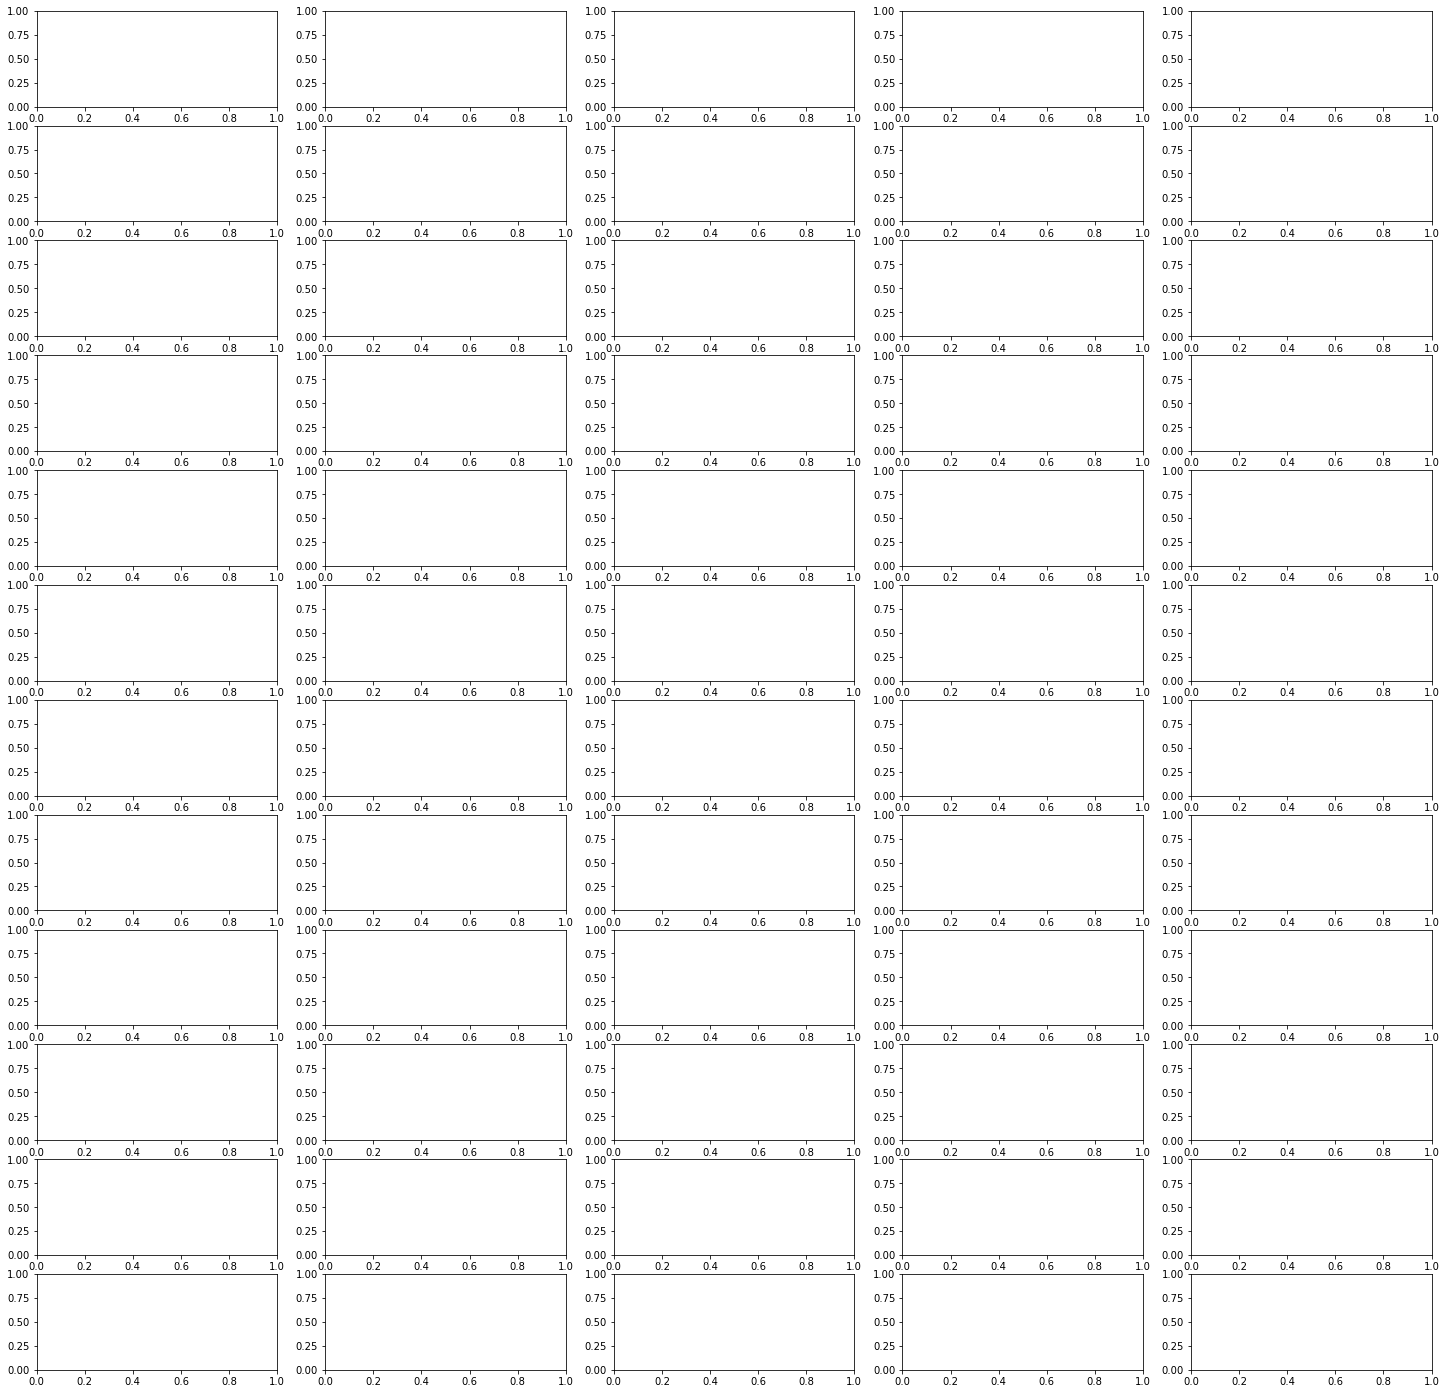

In [14]:

hour_advance = 12
# minutes_15_in_hour = 60 / 15
fig, axs = plt.subplots(hour_advance,5,figsize=(25,25))

xk = Sr @ Vtr[:,-1]

xtildak1 = Atilda @ xk
xk = xtildak1
xk1 = Ur @ xtildak1

for i in range(hour_advance):
    
    # for _ in range(2 * minutes_15_in_hour):
    #     xtildak1 = Atilda @ xk
    #     xk = xtildak1




    pred_day = xk1.reshape(h,w) #+ A_mean.reshape(h,w)
#     pred_day = xk1.reshape(w,h).T

    sample_day = igs.reshape(day*hour,h*w).T[:,365*13+i].reshape(h,w)#ionex_igs.get_numpy_tecmaps(2009,[1])[0,i]

    c1p_sample = c1p.reshape(day*hour,h*w).T[:,365*13+i].reshape(h,w)#ionex_c1p.get_numpy_tecmaps(2009,[1])[0,i]

    axs[i,0].set_title('True Map value',fontweight="bold")
    im = axs[i,0].imshow(sample_day,cmap='inferno')
    divider = make_axes_locatable(axs[i,0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[i,1].set_title('DMD {} Hours advance predicted value'.format((i+1)*2),fontweight="bold")
    im = axs[i,1].imshow(pred_day,cmap='inferno')
    divider = make_axes_locatable(axs[i,1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[i,2].set_title('DMD Diff map with total RMSE : {:.2f}'.format(np.sqrt(np.mean(np.square(sample_day-pred_day)))),fontweight="bold")
    im = axs[i,2].imshow(pred_day-sample_day,cmap='inferno')
    divider = make_axes_locatable(axs[i,2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[i,3].set_title('C1P map',fontweight="bold")
    im = axs[i,3].imshow(c1p_sample,cmap='inferno')
    divider = make_axes_locatable(axs[i,3])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)


    axs[i,4].set_title('C1P Diff map with total RMSE : {:.2f}'.format(np.sqrt(np.mean(np.square(sample_day-c1p_sample)))),fontweight="bold")
    im = axs[i,4].imshow(pred_day-c1p_sample,cmap='inferno')
    divider = make_axes_locatable(axs[i,4])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    xtildak1 = Atilda @ xk
    xk = xtildak1
    xk1 = Ur @ xtildak1

plt.show()

In [18]:

def plot_day(day):
    fig, axs = plt.subplots(2,6,figsize=(25,5))
    for r in range(2):
        for c in range(6):
            index = 6*r+c
            im = axs[r,c].imshow(day[index],cmap='inferno')
            divider = make_axes_locatable(axs[r,c])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(im, cax=cax)

def plot_day_and_compare(our_pred_day,comapre_day,true_day,title,to_plot = True,x_axis_range=[-180,180],y_axis_range=[60,-60]
                        ,filename_to_save=None,stat_dict=None):

    hour_advance = 12
    if stat_dict is None:
        stat_dict = {"pred" : [0]*hour_advance,"compare":[0]*hour_advance}


    fig, axs = plt.subplots(hour_advance,5,figsize=(25,25))
    fig.suptitle(title,fontweight="bold",fontsize=25)
    fig.tight_layout(pad=6.0)

    
    x_ticks_idx = [0,15,30,45,60,73]
    # x_ticks_idx = [0,25,50]#,30,45,60,73]
    x_tikcs_lbls = ['{:.0f}'.format(lon) for lon in np.linspace(x_axis_range[0],x_axis_range[1],len(x_ticks_idx))]

    y_ticks_idx = [0,15,30,45,60,71]
    # y_ticks_idx = [0,5,10,14]
    y_tikcs_lbls = ['{:.0f}'.format(lon) for lon in np.linspace(y_axis_range[0],y_axis_range[1],len(y_ticks_idx))]

    print(x_tikcs_lbls)

    for i in range(hour_advance):
        sample_day = true_day[i]
        c1p_sample = comapre_day[i]
        pred_day = our_pred_day[i]

        dmd_rmse = np.sqrt(np.mean(np.square(sample_day - pred_day)))
        compare_rmse = np.sqrt(np.mean(np.square(sample_day - c1p_sample)))
        stat_dict['pred'][i] += dmd_rmse
        stat_dict['compare'][i] += compare_rmse
        

        axs[i,0].set_title('True Map value',fontweight="bold")
        im = axs[i,0].imshow(sample_day,cmap='inferno',interpolation='nearest', aspect='auto')
        divider = make_axes_locatable(axs[i,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        axs[i,1].set_title('DMD {} Hours advance predicted value'.format((i+1)*2),fontweight="bold")
        im = axs[i,1].imshow(pred_day,cmap='inferno',interpolation='nearest', aspect='auto')
        divider = make_axes_locatable(axs[i,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        axs[i,2].set_title('DMD Diff map total RMSE : {:.2f}'.format(np.sqrt(np.mean(np.square(sample_day-pred_day)))),fontweight="bold")
        im = axs[i,2].imshow(sample_day-pred_day,cmap='inferno')
        divider = make_axes_locatable(axs[i,2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        axs[i,3].set_title('C1P map',fontweight="bold")
        im = axs[i,3].imshow(c1p_sample,cmap='inferno',interpolation='nearest', aspect='auto')
        divider = make_axes_locatable(axs[i,3])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)


        axs[i,4].set_title('C1P Diff map total RMSE : {:.2f}'.format(np.sqrt(np.mean(np.square(sample_day-c1p_sample)))),fontweight="bold")
        im = axs[i,4].imshow(sample_day-c1p_sample,cmap='inferno')
        divider = make_axes_locatable(axs[i,4])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)


        for j in range(axs.shape[1]):
            axs[i,j].set_xlabel("Longitude(°)")
            axs[i,j].set_ylabel("Latitude(°)")

            axs[i,j].set_yticks(y_ticks_idx)
            axs[i,j].set_yticklabels(y_tikcs_lbls)

            axs[i,j].set_xticks(x_ticks_idx)
            axs[i,j].set_xticklabels(x_tikcs_lbls)
            plt.setp(axs[i,j].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    
    if to_plot: plt.show()
    if not filename_to_save is None : fig.savefig(filename_to_save, bbox_inches='tight')

    return stat_dict

def RMSE(source,reference,n_days):
    
    diff = source[:n_days]-reference[:n_days]
    return np.sqrt(np.mean(diff**2,axis=(2,3)))

def DMD_predict(A,start_end_days_tuple,r_truncation=150,n_days_to_compare=1,n_hours=24,n_hours_timestep=2):

    _from_day,_to_day = start_end_days_tuple

    days,hours,h,w = A.shape
        # filter dual data of 0/24 hour
        
    A = A.reshape(days*hours,h*w).T
    
    #TEST -----------------------------------
#     A = A.reshape(day*hour,h,w).T
#     A = A.reshape(w*h,-1)
    
    
    # A_mean = np.mean(A,axis=1).reshape(-1,1)
    # A = (A - A_mean) 
    # print(A.shape)
    n_rows,n_cols = A.shape

    predicted_days = []

    for pred_day_number in tqdm(range(n_days_to_compare),position=0, leave=True):
    
        
        # ref_day = reference[_to_day+pred_day_number]
        # print(ref_day.shape)

        X_start = (_from_day+pred_day_number)*hours
        X_end = (_to_day+pred_day_number)*hours - 1

        Xprime_start = (_from_day+pred_day_number)*hours + 1
        Xprime_end = (_to_day+pred_day_number)*hours

        X = A[:,X_start:X_end]
        Xprime = A[:,Xprime_start:Xprime_end]
        # r_truncation = 150   #optimal_r(n_rows,n_cols,1)
        # print('Optimal r-truncation : {}'.format(r_truncation))
        Ur,Sr,Vtr,Atilda,Phi,Lambda,b = DMD(X,Xprime,r=r_truncation*hours,to_plot=False,s=0)
#         print(Sr.shape,X.shape,X_start,X_end,Xprime_start,Xprime_end)

        predicted_hours = []
        hour_advance = n_hours// n_hours_timestep + 1
        xk = Sr @ Vtr[:,-1]
        for i in range(hour_advance):
            xtildak1 = Atilda @ xk
            xk = xtildak1
            
            xk1 = Ur @ xtildak1
            pred_day = xk1.reshape(h,w) #+ A_mean.reshape(h,w)
            #TEST -----------------------------------
#             pred_day = xk1.reshape(w,h).T
            predicted_hours.append(pred_day)

            # rms = np.sqrt(np.mean(np.square(pred_day-ref_day[i])))
            # rmses.append(rms)

        predicted_days.append(np.array(predicted_hours))
    
    return np.array(predicted_days)

# DMD by DATE

In [19]:
igs.shape,c1p.shape

((726, 13, 71, 73), (726, 13, 71, 73))

In [26]:
from utilities.IONEX import date_to_year_day_number

#https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares/year/2014.html
#FLARE DAYS
Ds = [25,24,10,27,26,20,7,22,10,25]
Ms = [4,2,10,6,10,10,12,11,10,9,4]
Ys = [2014]*len(Ds)
MaxFlareMagnitude = ['x{}'.format(mag) for mag in [4.9,3.1,2.2,2,2,1.8,1.6,1.6,1.6,1.3]]
# QUITE DAYS
# Ds = [23,25,15,26,9,29,23,22,20,11]
# Ms = [8,1,2,3,4,5,6,7,9,10]
# Ys = [2014]*len(Ds)
# MaxFlareMagnitude = ['c{}'.format(mag) for mag in [6,1,2.3,1.5,2.1,1.4,1,0,1.1,1.8]]

date_indx = date_to_year_day_number(2014,11,7) - 1 + YEARS.index(2014) * 361
# print(date_indx)
# print(date_to_year_day_number('',2014,8,23))
# date_indx *= 13
# date_indx



igs_map = igs[date_indx,:,:,:]
date_map = np.array(ionex_igs.get_tecmaps(ionex_igs.ionex_local_path(2014,date_to_year_day_number(2014,8,23))))

# plot_day(igs_map)
# plot_day(date_map)

# fig, axs = plt.subplots(13,2,figsize=(5,13))
# print(axs.shape)
# for h in range(axs.shape[0]):

#     # print(date_map.shape)

#     axs[h,0].set_title(np.max(igs_map))
#     axs[h,0].imshow(igs_map)

#     axs[h,1].set_title(np.max(date_map[h]))
#     axs[h,1].imshow(date_map[h])
    
c1p_file_names[date_indx],igs_file_names[date_indx]

('/Volumes/SDD2T/PhD/TEC/ionex_c1p/2014/c1pg3110.14i',
 '/Volumes/SDD2T/PhD/TEC/ionex_igs/2014/igsg3110.14i')

In [27]:
import datetime
# DMD + plot and save
A = igs
print(A.shape)
# A = A[:,:,:,:] 
day,hour,h,w = A.shape
 # filter dual data of 0/24 hour
A = A.reshape(day*hour,h*w).T

N_HOURS = 12
stat_dict = {"pred" : [0]*N_HOURS,"compare":[0]*N_HOURS}

for (y,m,d,flare) in zip(Ys,Ms,Ds,MaxFlareMagnitude):

    date_indx = date_to_year_day_number(y,m,d) - 1 + YEARS.index(y) * 361
    # print(date_indx,y,m,d)
    c1p_map = np.array(ionex_c1p.get_tecmaps(ionex_c1p.ionex_local_path(y,date_to_year_day_number(y,m,d))))
    igs_map = np.array(ionex_igs.get_tecmaps(ionex_igs.ionex_local_path(y,date_to_year_day_number(y,m,d))))
    
    # c1p_map = c1p_map[:,16:30,38:48]
    # igs_map = igs_map[:,16:30,38:48]
    if c1p_map.shape[0] > 13:
        c1p_map = c1p_map[::2,:,:]
    print(igs_map.shape,c1p_map.shape) 
    
    

    last_year_day = date_indx - 1
    days_window = 300
    days_to_predict = 1

    predicted_days = DMD_predict(A=igs,start_end_days_tuple=(last_year_day-days_window,last_year_day),r_truncation=110,n_days_to_compare=days_to_predict,n_hours=24)
    print(predicted_days.shape)
    # print(date_indx,last_year_day)

    # plot_day(predicted_days[0])
    # plot_day(c1p_map)
    # dmd_ionex(c1p_file_names[date_indx],np.rint(predicted_days * 10))
    date = datetime.date(y, m, d)
    filename_to_save = '{}.pdf'.format(date)
    title = "{} Analisys. Max solar flare magnitude : {}".format(date,flare)
    stat_dict = plot_day_and_compare(predicted_days[0],c1p_map,igs_map,title,filename_to_save=filename_to_save,to_plot=False,stat_dict=stat_dict)



(726, 13, 71, 73)


  0%|          | 0/1 [00:00<?, ?it/s]

(13, 71, 73) (13, 71, 73)


100%|██████████| 1/1 [00:42<00:00, 42.50s/it]


(1, 13, 71, 73)
['-180', '-108', '-36', '36', '108', '180']


  0%|          | 0/1 [00:00<?, ?it/s]

(13, 71, 73) (13, 71, 73)


100%|██████████| 1/1 [00:43<00:00, 43.53s/it]


(1, 13, 71, 73)
['-180', '-108', '-36', '36', '108', '180']


  0%|          | 0/1 [00:00<?, ?it/s]

(13, 71, 73) (13, 71, 73)


100%|██████████| 1/1 [00:43<00:00, 43.50s/it]


(1, 13, 71, 73)
['-180', '-108', '-36', '36', '108', '180']


  0%|          | 0/1 [00:00<?, ?it/s]

(13, 71, 73) (13, 71, 73)


100%|██████████| 1/1 [00:42<00:00, 42.82s/it]


(1, 13, 71, 73)
['-180', '-108', '-36', '36', '108', '180']


  0%|          | 0/1 [00:00<?, ?it/s]

(13, 71, 73) (13, 71, 73)


100%|██████████| 1/1 [00:43<00:00, 43.58s/it]


(1, 13, 71, 73)
['-180', '-108', '-36', '36', '108', '180']


  0%|          | 0/1 [00:00<?, ?it/s]

(13, 71, 73) (13, 71, 73)


100%|██████████| 1/1 [00:44<00:00, 44.49s/it]


(1, 13, 71, 73)
['-180', '-108', '-36', '36', '108', '180']


[8.923992616620284, 7.231407530467076, 6.201674604092147, 4.494425342013101, 4.0783537515505, 4.177314403316549, 3.9046717542936564, 3.9978283705649402, 3.276841252996161, 3.1453302609294225, 3.524947882286243, 4.059177105388658]


[]

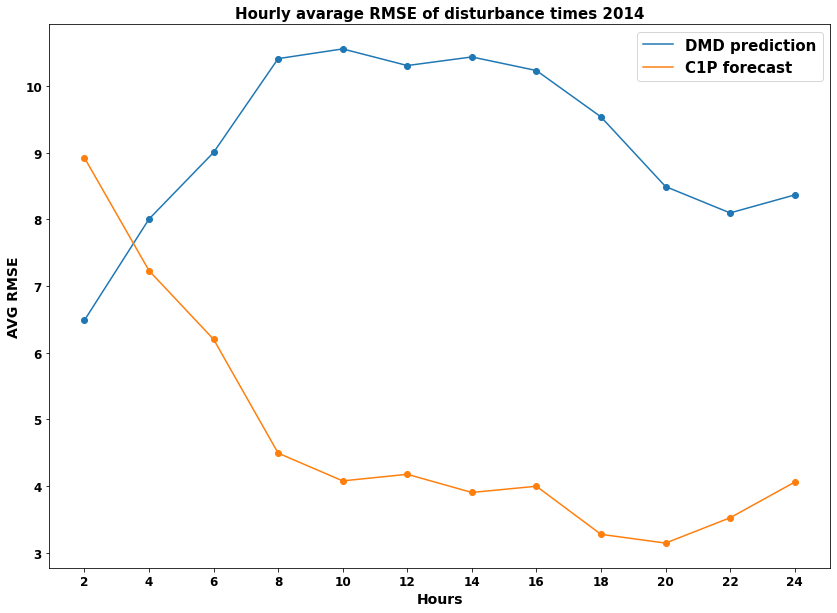

In [24]:
stat_dict_copy = stat_dict.copy()

for key in stat_dict_copy.keys():
    for i in range(len(stat_dict_copy[key])):
        stat_dict_copy[key][i] /= len(Ds)

print(stat_dict_copy['compare'])

plt.title('Hourly avarage RMSE of disturbance times 2014',fontsize=15,fontweight='bold')

plt.plot(stat_dict_copy['pred'], label = 'DMD prediction')
plt.plot(stat_dict_copy['compare'], label = 'C1P forecast')

x_axis = range(N_HOURS)
plt.scatter(x_axis,stat_dict_copy['pred'])
plt.scatter(x_axis,stat_dict_copy['compare'])

plt.xlabel('Hours',fontsize=14,fontweight='bold')
plt.ylabel('AVG RMSE',fontsize=14,fontweight='bold')

plt.xticks(range(0,13),list(map(str,range(2,28,2))),fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.legend(prop={'size':15,'weight':'bold'})

plt.plot()


In [ ]:
last_year_day = 365
days_window = 180
days_to_predict = 90

print(igs.shape)

predicted_days = DMD_predict(A=igs,start_end_days_tuple=(last_year_day-days_window,last_year_day),r_truncation=110,n_days_to_compare=days_to_predict,n_hours=24)
print(predicted_days.shape)   

# plot_day(predicted_days[0])
# plot_day(igs[last_year_day])

In [ ]:
rmse_pred=RMSE(predicted_days,igs[last_year_day:],days_to_predict)
rmse_pred.shape,np.mean(rmse_pred,axis=0),np.mean(rmse_pred),np.std(rmse_pred)

In [ ]:
rmse_c1p = RMSE(c1p[last_year_day:],igs[last_year_day:],days_to_predict)
rmse_c1p.shape,np.mean(rmse_c1p,axis=0),np.mean(rmse_c1p),np.std(rmse_c1p)

In [ ]:
plt.figure(figsize=(10,10))

plt.title('January-March 2015 RMSE` by hours')
# plt.title('January 1st-10st 2015 RMSE` by hours')
plt.plot(np.mean(rmse_pred,axis=0),label='Pred RMSE : mean {}, std {}'.format(np.mean(rmse_pred),np.std(rmse_pred)))
plt.plot(np.mean(rmse_c1p,axis=0),label='CODE RMSE : mean {}, std {}'.format(np.mean(rmse_c1p),np.std(rmse_c1p)))

plt.scatter(range(len(np.mean(rmse_pred,axis=0))),np.mean(rmse_pred,axis=0))
plt.scatter(range(len(np.mean(rmse_c1p,axis=0))),np.mean(rmse_c1p,axis=0))

plt.xticks(range(0,13),list(map(str,range(2,28,2))))
plt.legend()
plt.show()

In [ ]:
return

# DEEP MODEL

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.__version__,DEVICE,torch.cuda.device_count() 

In [ ]:
A = igs
print(A.shape)
# A = A[:,:,:,:] 
day,hour,h,w = A.shape
 # filter dual data of 0/24 hour
A = A.reshape(day*hour,h*w).T


print(day,hour,h,w,day*hour,h*w)
A.shape

In [ ]:

TOTAL_DATA = day
TRAINING_DAYS = int(TOTAL_DATA * 0.6)
TEST_DAYS = TOTAL_DATA-TRAINING_DAYS

# print(TOTAL_DATA,TRAINING_DAYS,TEST_DAYS)

training_days = int(TRAINING_DAYS*0.7)
validation_days = TRAINING_DAYS-training_days
print(training_days,validation_days,day)
training_days*=hour
validation_days*=hour
# print(training_days,validation_days)
x_train = A[:,:training_days-1].T
y_train = A[:,1:training_days].T

# p = np.random.permutation(x_train.shape[0])
# x_train = x_train[p,:]
# y_train = y_train[p,:]

print('x_train',x_train.shape)
x_valid = A[:,training_days:training_days+validation_days-1].T
y_valid = A[:,training_days+1:training_days+validation_days].T
print('x_valid',x_valid.shape)
X_test = A[:,training_days+validation_days:-1].T
Y_test = A[:,training_days+validation_days+1:].T
print('X_test',X_test.shape)

t_mean = np.mean(x_train,axis=0)
t_std = np.std(x_train,axis=0)
x_train = (x_train-t_mean)/t_std
y_train = (y_train-t_mean)/t_std
x_valid = (x_valid-t_mean)/t_std
y_valid = (y_valid-t_mean)/t_std
X_test = (X_test-t_mean)/t_std
Y_test = (Y_test-t_mean)/t_std

tr_x_train = torch.from_numpy(x_train).float()
tr_x_valid = torch.from_numpy(x_valid).float()
tr_y_train = torch.from_numpy(y_train).float()
tr_y_valid = torch.from_numpy(y_valid).float()

print(tr_x_train.shape,np.mean(y_train),np.std(y_train))

class SeriesDataset(Dataset):

    def __init__(self,X,y):

        self.X = X
        self.y = y

    def __getitem__(self, index):
    
         return (self.X[index],self.y[index])
    
    def __len__(self):
        return self.X.shape[0]

train_dataset = SeriesDataset(tr_x_train,tr_y_train)
validation_dataset = SeriesDataset(tr_x_valid,tr_y_valid)

In [ ]:
MODEL_NAME = 'model.pt'

class TecPredictionModel(nn.Module):

    def __init__(self,n_features):
        super(TecPredictionModel,self).__init__()
        
        self.en_l1 = nn.Linear(n_features,n_features)
        self.en_l2 = nn.Linear(n_features,n_features)
        self.en_l3 = nn.Linear(n_features,n_features)
        # self.en_l31 = nn.Linear(1024,1024)
        self.en_l4 = nn.Linear(n_features,n_features)

        self.dec_l1 = nn.Linear(n_features,n_features)
        # self.dec_l11 = nn.Linear(1024,1024)
        self.dec_l2 = nn.Linear(n_features,n_features)
        self.dec_l3 = nn.Linear(n_features,n_features)
        self.dec_l4 = nn.Linear(n_features,n_features)


        self.active_fn = nn.Tanh()
        # self.active_fn = nn.ReLU()
        # self.active_fn = nn.Sigmoid()
        self.drop = nn.Dropout(0.1)

#         self.linear_stack = nn.Sequential(
#             nn.Linear(n_features,(n_features+1)//2),
#             nn.Tanh(),
#             nn.Linear((n_features+1)//2,(n_features+1)//2),
#             nn.Tanh(),
#             nn.Linear((n_features+1)//2,(n_features+1)//4),
#             nn.Tanh(),
#             nn.Linear((n_features+1)//4,1),
#             nn.Tanh()
#         )

    def forward(self,x):
        # if not torch.is_tensor(x):
            # x = torch.from_numpy(x).float()
        
        # x = self.en_l1(x)
        x = self.en_l1(x)
        x = self.active_fn(x)
        # x = self.en_l2(x)
        # x = self.active_fn(x)
        # x = self.en_l3(x)
        # x = self.active_fn(x)
        # x = self.en_l4(x)
        # x = self.active_fn(x)



        # x = self.dec_l1(x)
        # x = self.active_fn(x)
        # x = self.dec_l2(x)
        # x = self.active_fn(x)
        # x = self.dec_l3(x)
        # x = self.active_fn(x)
        x = self.dec_l4(x)
        # x = self.active_fn(x)

        return x 



model = TecPredictionModel(x_train.shape[1]).to(DEVICE)

In [ ]:
_xSample,_ySample = train_dataset[0]
out = model(_xSample.to(DEVICE))

model,out,_ySample,next(model.parameters()).device

In [ ]:
# loss_func = nn.MSELoss()
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-1)

In [ ]:
import sys
from IPython.display import clear_output, display


def train(model,datasetTuple,loss_fn,optimizer,epocs=1,batch_size = 8):

    prev_eval_loss = sys.maxsize
    train_dataset,valid_dataset = datasetTuple

    train_dataloader = DataLoader(train_dataset,batch_size=batch_size,shuffle=False)
    valid_dataloader = DataLoader(valid_dataset,batch_size=batch_size,shuffle=False)

    train_loss,valid_loss = [],[]

    for epoc in range(epocs):
        running_loss = 0
        running_valid_loss = 0
        
        model.train()
        for batch,(X,y) in enumerate(train_dataloader):
            X,y = X.to(DEVICE),y.to(DEVICE)
            # print(X.is_cuda)
            
            # print(batch,X.shape,y.shape)
            pred = model(X)
            loss = loss_fn(pred,y)
            optimizer.zero_grad()
            # optimizer.clip
            loss.backward()
            optimizer.step()

            running_loss+=loss.item()
        # print(running_loss/len(train_dataloader))
        t_loss = running_loss/len(train_dataloader)
        train_loss.append(t_loss)
        # print(running_loss/len(train_dataloader),end="\r")

        with torch.no_grad():
            model.eval()
            for batch,(X,y) in enumerate(valid_dataloader):
                X,y = X.to(DEVICE),y.to(DEVICE)
                pred = model(X)
                loss = loss_fn(pred,y)
                running_valid_loss += loss.item()
            
        eval_loss = running_valid_loss/len(valid_dataloader)
        if prev_eval_loss > eval_loss:
            prev_eval_loss = eval_loss
            torch.save(model.state_dict(),MODEL_NAME)
        valid_loss.append(eval_loss)
        clear_output(wait=False)
        print("epoch : {}, training loss : {}, eval loss : {}".format(epoc,t_loss,eval_loss))
    return (train_loss,valid_loss)


TRAIN = True
if TRAIN:
    train_loss,valid_loss = train(model,(train_dataset,validation_dataset),loss_func,optimizer,epocs=30)



In [ ]:
plt.figure(figsize=(4,4))
plt.plot(train_loss,label='Train loss')
plt.plot(valid_loss,label='Valid loss')
plt.xlabel('epoch')
plt.legend()
plt.plot()

In [ ]:
def predict_day(model,input_tec,DEVICE,h,w,day_hours=13,mean=0,std=1):


    predicted_hours = []
    for i in range(day_hours):
        
        input_tec = model(input_tec.float().to(DEVICE))
        pred_y = input_tec.to('cpu').detach().numpy()
        # print(pred_y.shape)
        predicted_hours.append(pred_y.reshape(h,w) * std + mean)

    return np.array(predicted_hours)


def NN_predict(A,model,_from_day,DEVICE=None,n_days_to_compare=1,n_hours=24,n_hours_timestep=2,mean=0,std=1):

    # print(A.shape)
    days,hours,h,w = A.shape
    A = A.reshape(days*hours,h*w).T
    # print(A.shape)
    predicted_days = []

    if DEVICE is None:
        DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = model.to(DEVICE)

    for pred_day_number in range(n_days_to_compare):
    
    
        # ref_day = reference[_to_day+pred_day_number]
        # print(ref_day.shape)

        input_day_index = (_from_day+pred_day_number)*hours
        # print(input_day_index)
        input_tec = A[:,input_day_index]

        day_hours = n_hours//n_hours_timestep+1

        pred_day = predict_day(model,torch.tensor(input_tec).to(DEVICE),DEVICE,h,w,day_hours,mean=mean,std=std)
        predicted_days.append(pred_day)

    return np.array(predicted_days)

In [ ]:

tr_X_test,tr_Y_test = torch.from_numpy(X_test).float(),torch.from_numpy(Y_test).float()

test_dataset = SeriesDataset(X_test,Y_test)
test_dataloader = DataLoader(test_dataset,batch_size=1,shuffle=False)

_x,_y = iter(test_dataloader).next()
print(type(_x))

model = TecPredictionModel(x_train.shape[1]).to(DEVICE)
model.load_state_dict(torch.load(MODEL_NAME))
model.eval()
model(_x.float().to(DEVICE)),_y

In [ ]:
_y.numpy()
plt.imshow(model(_x.float()).numpy().reshape(h,w))

In [ ]:
A = igs
# pred_NN = NN_predict(A,model,(training_days+validation_days)//hour,DEVICE,n_days_to_compare=365,mean=t_mean,std=t_std)
pred_NN = NN_predict(A,model,(training_days+validation_days)//hour,DEVICE,n_days_to_compare=10,mean=0,std=1)
pred_NN.shape



In [ ]:
plot_day(pred_NN[5])
# plot_day(igs[(training_days+validation_days+20)//hour])
print(t_mean,t_std)

In [ ]:
rmse_pred=RMSE(pred_NN,igs[(training_days+validation_days)//hour:],days_to_predict)
rmse_pred.shape,np.mean(rmse_pred,axis=0),np.mean(rmse_pred),np.std(rmse_pred)